# Random Forest for Prediction

In [92]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [93]:
## load in Train Set
X_train_path = "/Users/claudia/DSA4262-ACMXZ/data/raw_data/X_raw_enc.parquet"
X_train = pd.read_parquet(X_train_path)
y_train_path = "/Users/claudia/DSA4262-ACMXZ/data/raw_data/y_raw.parquet"
y_train = pd.read_parquet(y_train_path)

### convert y_train into int
y_train = y_train.values.ravel()
y_train = y_train.astype(int)

In [94]:
rfe_features = ['std_-1_25', 'std_-1_50', 'std_-1_75', 'std_-1_mean', 'std_-1_min',
       'mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean', 'mean_-1_min',
       'dwelling_time_0_50', 'dwelling_time_0_mean', 'std_0_25', 'std_0_50',
       'std_0_75', 'std_0_mean', 'std_0_min', 'std_0_max', 'mean_0_25',
       'mean_0_50', 'mean_0_75', 'mean_0_mean', 'mean_0_min', 'mean_0_max',
       'dwelling_time_+1_mean', 'std_+1_25', 'std_+1_50', 'mean_+1_25',
       'mean_+1_50', 'mean_+1_75', 'mean_+1_mean', 'mean_+1_min',
       'mean_+1_max', 'relative_position', 'position_1_G', 'position_5_T']

In [95]:
rfc = RandomForestClassifier(random_state = 42, n_estimators = 220, max_features = "sqrt", max_depth = 30,
                        min_samples_split = 2, min_samples_leaf = 1, bootstrap = False)

rfc.fit(X_train[rfe_features], y_train)

KeyboardInterrupt: 

# Prediction

In [ ]:
def prediction(csv_fpath):
    ## read csv file
    data = pd.read_csv(csv_fpath)
    print(data.shape)

    ## save transcript and position col for concatenation later
    data_id_col = data[["transcript", "position"]]

    ## predict using rfc
    data_pred = rfc.predict_proba(data[rfe_features])[:,1]
    print(len(data_pred))

    ## convert predictions to dataframe
    data_pred_df = pd.DataFrame(data_pred, columns = ['score'])

    ## 
    data_pred_df = pd.concat([data_id_col, data_pred_df], axis = 1)
    print(f"Prediction file is of shape: {data_pred_df.shape}")

    return data_pred_df

In [ ]:
k562_rep4_run1_path = "/Users/claudia/Downloads/K562_rep4_run1.csv"
k562_rep4_run1_pred = prediction(k562_rep4_run1_path)
k562_rep4_run1_pred.head()

In [ ]:
k562_rep4_run1_pred.to_csv("data/aws_predictions/k562_rep4_run1_prediction.csv")

In [ ]:
k562_rep5_run1_path = "/Users/claudia/Downloads/K562_rep5_run1.csv"
k562_rep5_run1_pred = prediction(k562_rep5_run1_path)
k562_rep5_run1_pred.head()

(116519, 76)
116519
Prediction file is of shape: (116519, 3)


,transcript,position,score
0,ENST00000371582,1030,0.004545
1,ENST00000371582,105,0.013636
2,ENST00000371582,1123,0.018182
3,ENST00000371582,147,0.072751
4,ENST00000371582,242,0.045583


In [ ]:
k562_rep5_run1_pred.to_csv("../data/aws_predictions/k562_rep5_run1_prediction.csv")

In [ ]:
k562_rep6_run1_path = "/Users/claudia/Downloads/K562_rep6_run1.csv"
k562_rep6_run1_pred = prediction(k562_rep6_run1_path)
k562_rep6_run1_pred.head()

(99502, 76)
99502
Prediction file is of shape: (99502, 3)


,transcript,position,score
0,ENST00000373020,1013,0.177273
1,ENST00000373020,1149,0.150000
2,ENST00000373020,512,0.322727
3,ENST00000373020,689,0.131818
4,ENST00000373020,823,0.009091


In [ ]:
k562_rep6_run1_pred.to_csv("../data/aws_predictions/k562_rep6_run1_prediction.csv")

In [ ]:
mcf7_rep3_run1_path = "/Users/claudia/Downloads/MCF7_rep3_run1.csv"
mcf7_rep3_run1_pred = prediction(mcf7_rep3_run1_path)
mcf7_rep3_run1_pred.head()

(119481, 76)
119481
Prediction file is of shape: (119481, 3)


,transcript,position,score
0,ENST00000373020,1006,0.009091
1,ENST00000373020,1013,0.009091
2,ENST00000373020,1149,0.000000
3,ENST00000373020,512,0.018182
4,ENST00000373020,689,0.009091


In [ ]:
mcf7_rep3_run1_pred.to_csv("../data/aws_predictions/mcf7_rep3_run1_prediction.csv")

In [ ]:
mcf7_rep4_run1_path = "/Users/claudia/Downloads/MCF7_rep4_run1.csv"
mcf7_rep4_run1_pred = prediction(mcf7_rep4_run1_path)
mcf7_rep4_run1_pred.head()

(119481, 76)
119481
Prediction file is of shape: (119481, 3)


,transcript,position,score
0,ENST00000373020,1006,0.009091
1,ENST00000373020,1013,0.009091
2,ENST00000373020,1149,0.000000
3,ENST00000373020,512,0.018182
4,ENST00000373020,689,0.009091


In [ ]:
mcf7_rep4_run1_pred.to_csv("../data/aws_predictions/mcf7_rep4_run1_prediction.csv")

In [ ]:
%pwd

'/Users/claudia/DSA4262-ACMXZ/prediction'

# Data.JSON

In [ ]:
## function to get key of a dictionary
def get_key(dictionary):
    key_object = dictionary.keys()
    key = list(key_object)[0]
    return key

In [ ]:
## function to help concatenate columns to get transcript, position, nucleotides
def concat_col(transcript, position, nucleotide, n):
    t_df = pd.DataFrame([transcript]*n)
    p_df = pd.DataFrame([position]*n)
    nu_df = pd.DataFrame([nucleotide]*n)
    n_df = pd.DataFrame([n]*n)

    ## concat columns together
    final_df = pd.concat([t_df, p_df, nu_df, n_df], axis = 1)
    final_df.columns = ['transcript', 'position', 'nucleotides', 'reads_count']
    return final_df

In [ ]:
## function to parse line in json file
def parse_line(line):
    ## get transcript
    t = get_key(line)

    ## get position
    p = get_key(line[t])

    ## get nucleotide seq
    nu = get_key(line[t][p])

    ## get number of reads
    reads_count = len(line[t][p][nu])

    ## get dataframe of list of reads
    reads = pd.DataFrame(line[t][p][nu])

    ## concat columns together to get transcript, position, nucleotides and all dwelling time, std, mean
    df = pd.concat([concat_col(t, p, nu, reads_count), reads], axis = 1)
    df.columns = ['transcript', 'position', 'nucleotides', 'reads_count', 'dwellingtime_-1', 'std_-1', 'mean_-1', 'dwellingtime_0', 'std_0', 'mean_0', 'dwellingtime_+1', 'std_+1', 'mean_+1']

    return df

In [ ]:
import json

In [ ]:
data0 = [json.loads(line) for line in open("/Users/claudia/Downloads/data.json", 'r')]

## parse all lines in json file into dataframe for concatenation
reads0_df = [parse_line(data0[i]) for i in range(len(data0))]
data0_df = pd.concat(reads0_df, axis = 0)
data0_df.head()

,transcript,position,nucleotides,reads_count,dwellingtime_-1,std_-1,mean_-1,dwellingtime_0,std_0,mean_0,dwellingtime_+1,std_+1,mean_+1
0,ENST00000000233,244,AAGACCA,185,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,185,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,185,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,185,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,185,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2


In [ ]:
import os

In [ ]:
import numpy as np
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder

sys.path.append(os.path.abspath("../util/model/"))
from training import get_percent

In [ ]:
# gene_id and labels removed from groupby and temp.columns
def feature_eng(df):
    temp = pd.DataFrame(df.groupby(['transcript', 'position', 'nucleotides', 'reads_count'], as_index=False)
                           .agg({'dwellingtime_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_-1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'dwellingtime_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_0': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'dwellingtime_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'std_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max],
                                'mean_+1': [get_percent(25), get_percent(50), get_percent(75), np.mean, np.min, np.max]}))
    temp.columns = ['transcript', 'position', 'nucleotides', 'reads_count',
                        'dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 'dwelling_time_-1_mean','dwelling_time_-1_min', 'dwelling_time_-1_max',
                        'std_-1_25', 'std_-1_50', 'std_-1_75', 'std_-1_mean','std_-1_min', 'std_-1_max',
                        'mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean','mean_-1_min', 'mean_-1_max',
                        'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean','dwelling_time_0_min','dwelling_time_0_max',
                        'std_0_25', 'std_0_50', 'std_0_75', 'std_0_mean','std_0_min', 'std_0_max',
                        'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean','mean_0_min', 'mean_0_max',
                        'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 'dwelling_time_+1_mean','dwelling_time_+1_min','dwelling_time_+1_max',
                        'std_+1_25', 'std_+1_50', 'std_+1_75', 'std_+1_mean','std_+1_min', 'std_+1_max',
                        'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean','mean_+1_min', 'mean_+1_max']
    return temp

# gene_id removed from groupby
def relative_position(df):
    df["position"] = df["position"].astype(int)

    ## find relative position of each read in each transcript
    df["relative_position"] = df.groupby(["transcript"])["position"].transform(lambda x: (x - x.min())/(x.max()-x.min()))

    ## note: have NAs because there's transcripts with only one position
    ## fill the NAs with 0
    df["relative_position"] = df["relative_position"].fillna(0)

    return df

## variables needed for encoding
pipe = pickle.load(open("../data/raw_data/encoding_pipeline.pkl", "rb"))

cols_to_map = ['reads_count', 'dwelling_time_-1_25', 'dwelling_time_-1_50', 'dwelling_time_-1_75', 
                'dwelling_time_-1_mean', 'dwelling_time_-1_min', 'dwelling_time_-1_max', 'std_-1_25', 
                'std_-1_50', 'std_-1_75', 'std_-1_mean', 'std_-1_min', 'std_-1_max', 'mean_-1_25', 
                'mean_-1_50', 'mean_-1_75', 'mean_-1_mean', 'mean_-1_min', 'mean_-1_max', 
                'dwelling_time_0_25', 'dwelling_time_0_50', 'dwelling_time_0_75', 'dwelling_time_0_mean', 
                'dwelling_time_0_min', 'dwelling_time_0_max', 'std_0_25', 'std_0_50', 'std_0_75', 
                'std_0_mean', 'std_0_min', 'std_0_max', 'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean', 
                'mean_0_min', 'mean_0_max', 'dwelling_time_+1_25', 'dwelling_time_+1_50', 'dwelling_time_+1_75', 
                'dwelling_time_+1_mean', 'dwelling_time_+1_min', 'dwelling_time_+1_max', 'std_+1_25', 
                'std_+1_50', 'std_+1_75', 'std_+1_mean', 'std_+1_min', 'std_+1_max', 'mean_+1_25', 'mean_+1_50', 
                'mean_+1_75', 'mean_+1_mean', 'mean_+1_min', 'mean_+1_max', 'relative_position', 'position_0_C', 
                'position_0_G', 'position_0_T', 'position_0_A', 'position_1_A', 'position_1_G', 'position_1_T', 
                'position_2_A', 'position_2_G', 'position_3_A', 'position_4_C', 'position_5_C', 'position_5_A', 
                'position_5_T', 'position_6_T', 'position_6_A', 'position_6_G', 'position_6_C']

def encoding(df, columns_to_map):
    id_val = df[['transcript','position']] ## needed to concat with pred proba for submission

    for i in range(7):
        df['position_' + str(i)] = df['nucleotides'].apply(lambda x: x[i])
    
    df_enc = pd.DataFrame({col: vals for vals, col in zip(pipe.transform(df).T, columns_to_map)})

    return df_enc, id_val

In [ ]:
## preprocess dataset 1
percentile_df0 = feature_eng(data0_df)
print(percentile_df0.shape)

relative_position_df0 = relative_position(percentile_df0)
print(relative_position_df0.shape)

encoded_df0, id_val_df0 = encoding(relative_position_df0, cols_to_map)
print(encoded_df0.shape, id_val_df0.shape)

data0_pp = encoded_df0

(121838, 58)
(121838, 59)
(121838, 74) (121838, 2)


In [ ]:
data0_pred = rfc.predict_proba(data0_pp[rfe_features])[:,1]
print(len(data0_pred))

data0_res = pd.DataFrame(data0_pred, columns = ['score'])

data0_res = pd.concat([id_val_df0, data0_res], axis = 1)
print(data0_res.shape)
data0_res.head()

121838
(121838, 3)


,transcript,position,score
0,ENST00000000233,244,0.009091
1,ENST00000000233,261,0.000000
2,ENST00000000233,316,0.027273
3,ENST00000000233,332,0.009197
4,ENST00000000233,368,0.013737


In [ ]:
info_data_path = "../data/raw_data/data.info"
with open(info_data_path, 'r') as f:
    info = f.read().splitlines()

info_list = [info[i].split(",") for i in range(len(info))]
info_df = pd.DataFrame(info_list[1:]) 
info_df.columns = info_list[0]
info_df.head()

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0


In [ ]:
type(data0_res["position"])

pandas.core.series.Series

In [ ]:
data0_pred_labels = pd.concat([data0_res, info_df], axis = 1, join = "outer")

data0_pred_labels.head()

,transcript,position,score,gene_id,transcript_id,transcript_position,label
0,ENST00000000233,244,0.009091,ENSG00000004059,ENST00000000233,244,0
1,ENST00000000233,261,0.000000,ENSG00000004059,ENST00000000233,261,0
2,ENST00000000233,316,0.027273,ENSG00000004059,ENST00000000233,316,0
3,ENST00000000233,332,0.009197,ENSG00000004059,ENST00000000233,332,0
4,ENST00000000233,368,0.013737,ENSG00000004059,ENST00000000233,368,0


In [ ]:
data0_pred_labels.drop(["transcript_id", "transcript_position"], axis = 1, inplace = True)

In [ ]:
data0_pred_labels.head()

,transcript,position,score,gene_id,label
0,ENST00000000233,244,0.009091,ENSG00000004059,0
1,ENST00000000233,261,0.000000,ENSG00000004059,0
2,ENST00000000233,316,0.027273,ENSG00000004059,0
3,ENST00000000233,332,0.009197,ENSG00000004059,0
4,ENST00000000233,368,0.013737,ENSG00000004059,0


In [ ]:
data0_pred_labels[["label", "score"]].groupby(["label"]).agg(pd.Series.mode)

,score
label,
0,0.0
1,0.0


In [ ]:
data0_pred_labels[["label", "score"]].groupby(["label"]).mean()

,score
label,
0,0.047027
1,0.135612


In [ ]:
bool_index = data0_pred_labels["score"] >= 0.1356

In [ ]:
data0_pred_labels[">= threshold"] = data0_pred_labels["score"] >= 0.1356
data0_pred_labels.head() 

,transcript,position,score,gene_id,label,>= threshold
0,ENST00000000233,244,0.009091,ENSG00000004059,0,False
1,ENST00000000233,261,0.000000,ENSG00000004059,0,False
2,ENST00000000233,316,0.027273,ENSG00000004059,0,False
3,ENST00000000233,332,0.009197,ENSG00000004059,0,False
4,ENST00000000233,368,0.013737,ENSG00000004059,0,False


In [131]:
data0_pred_labels['label'] = data0_pred_labels['label'].astype(str).astype(int)
numbers = [float(x)/100 for x in range(15)]
for i in numbers:
    data0_pred_labels[i] = data0_pred_labels.score.map(lambda x:1 if x>i else 0)
data0_pred_labels.head()

,transcript,position,score,gene_id,label,>= threshold,0.0,0.01,0.02,0.03,...,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14
0,ENST00000000233,244,0.009091,ENSG00000004059,0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENST00000000233,261,0.000000,ENSG00000004059,0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENST00000000233,316,0.027273,ENSG00000004059,0,False,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ENST00000000233,332,0.009197,ENSG00000004059,0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENST00000000233,368,0.013737,ENSG00000004059,0,False,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


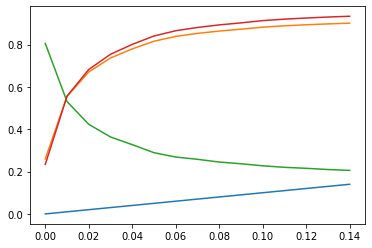

In [133]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
for i in numbers:
    cm1 = metrics.confusion_matrix(data0_pred_labels.label,data0_pred_labels[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,Sensitivity,specificity]
plt.plot(cutoff_df)
plt.show()

In [100]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

In [134]:
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.00,0.00,0.259623,0.804932,0.233966
0.01,0.01,0.555098,0.530411,0.556259
0.02,0.02,0.670374,0.423196,0.682004
0.03,0.03,0.736371,0.363288,0.753925
0.04,0.04,0.779231,0.327123,0.800504
0.05,0.05,0.815509,0.289132,0.840276
0.06,0.06,0.838203,0.268493,0.865009
0.07,0.07,0.852567,0.257900,0.880546
0.08,0.08,0.863491,0.244932,0.892595
0.09,0.09,0.872314,0.236895,0.902211


In [118]:
import matplotlib.pyplot as plt
cutoff_df 
plt.show()

In [71]:
data0_pred_labels[data0_pred_labels[">= threshold"] == True]["label"].value_counts()

0    7939
1    1130
Name: label, dtype: int64

In [73]:
data0_pred_labels[data0_pred_labels[">= threshold"] == False]["label"].value_counts()

0    108424
1      4345
Name: label, dtype: int64

In [63]:
data0_pred_labels[[bool_index]]

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [columns]"